In [11]:
from VisionTransformer import Patches, run_experiment, plot_history, create_vit
from util import load_data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import ops
import numpy as np
PATH = '../sfddd/imgs/train'

In [14]:
X,y = load_data(10, PATH)
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, random_state=42)
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
image = X[0]

100%|██████████| 10/10 [00:00<00:00, 230.24it/s]


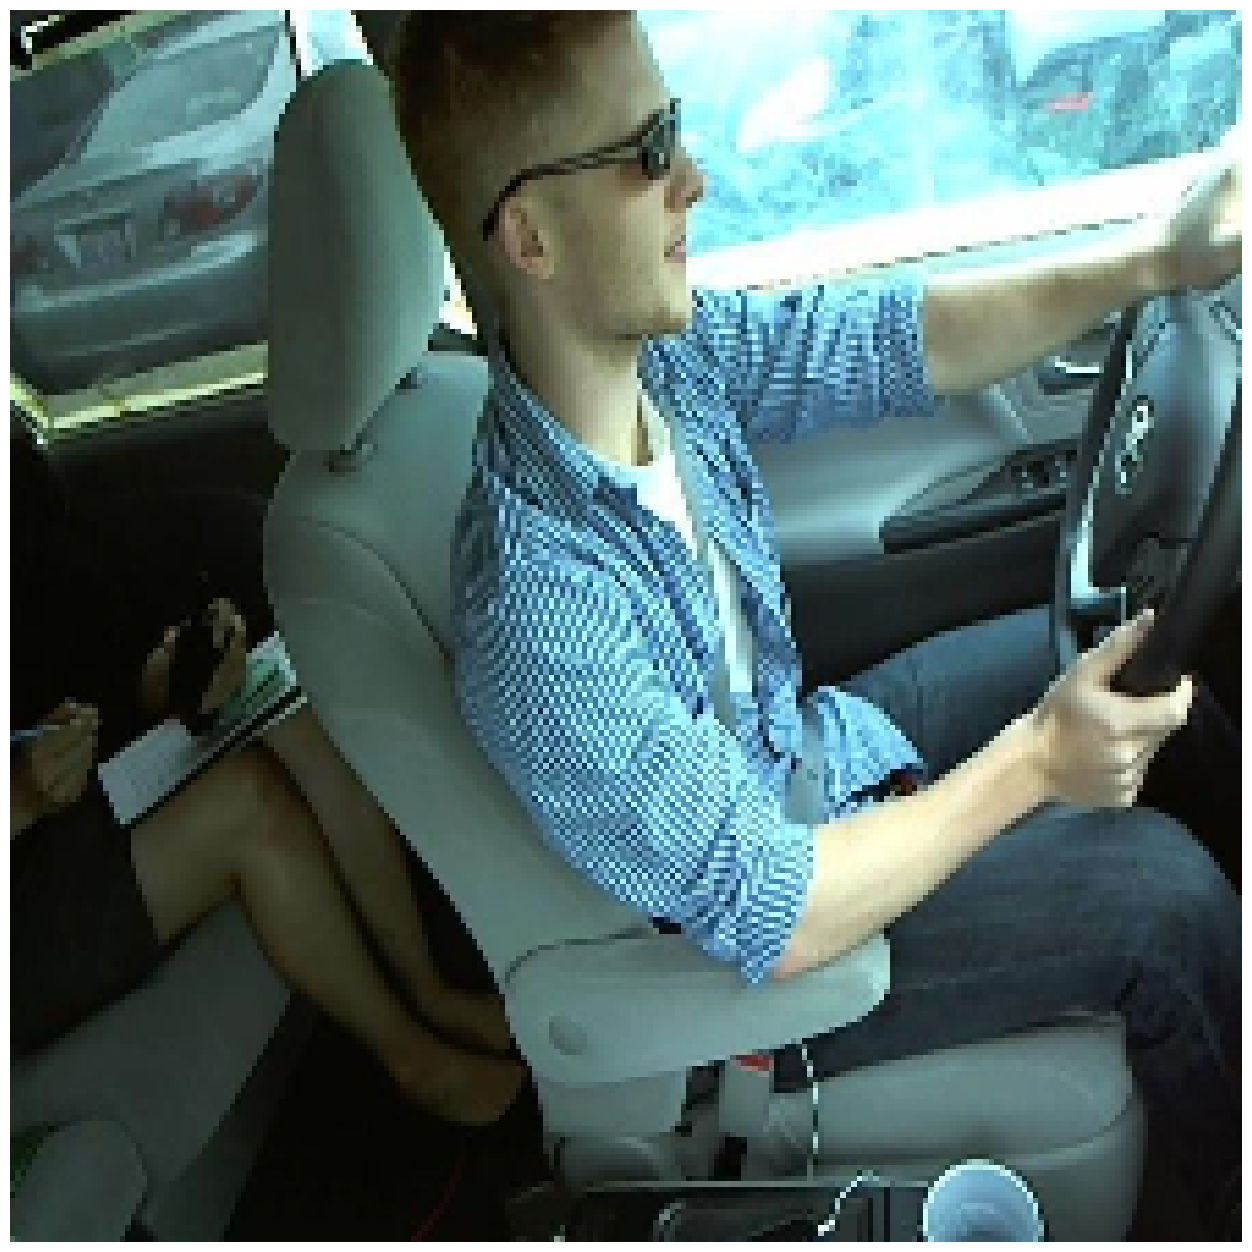

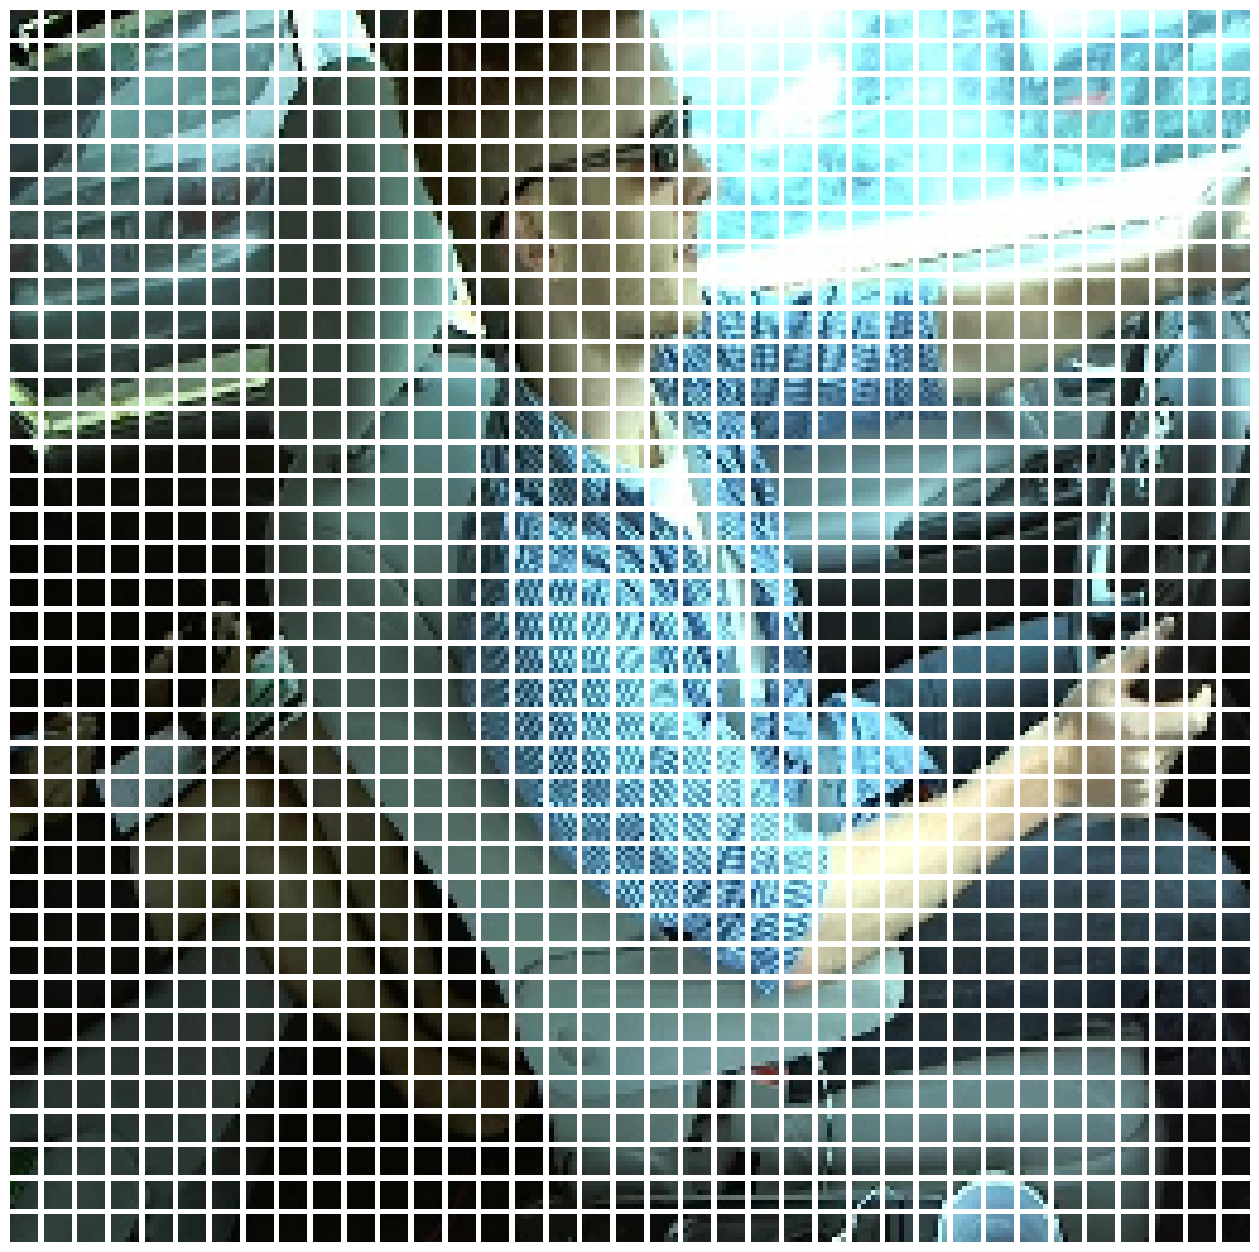

In [3]:
plt.figure(figsize=(16,16))
plt.imshow(image)
plt.axis('off')

patch_size = 6
image_size = 224

resized_image = ops.convert_to_tensor([image], dtype='float32')
patches = Patches(patch_size)(resized_image)

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(16, 16))

for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(ops.convert_to_numpy(patch_img).astype("uint8"))
    plt.axis("off")

In [ ]:
vit_classifier = create_vit()
history = run_experiment(vit_classifier, X_train, y_train, X_test, y_test)

# plot_history("loss")
# plot_history("top-5-accuracy")

Epoch 1/10
